# Assignment 1 - Jayden Prakash

## Part 1 - Short Answer

#### <b>Question 1</b> - What is supervised learning? What are two purposes/goals? How do these different goals change our approach?


Supervised learning is a form of machine learning where we use a given set of inputs and outputs  to predict a new set of outputs given a new set of inputs. Previous data is usually used in order to train the algorithm in order to provide accurate predictions. One of the purposes of supervised learning is to classify data based on models which have been developed already and the other purpose is to make predictions of future outcomes based on these models. If you are wanting to predict a discrete variable such as if Something is 1 or 0, you would use a classifcation model, however if you were wanting to predict outcomes based on models or parameters you would use regression as these provide continuous variables which are usually used in predictions.

#### <b> Question 2 </b> - How do obtain insights about a problem using linear regression?

Linear regression is what is known as a parametric model. A parametric model learns from the parameters that describe the problem radther than predicting from past instances, as such the predictions are informed by the parameters. Linear regression uses two types of variables, the dependent variable which is what is being measured and the independent variables which is what is used to predict. Its represented by a linear equation that takes a given set of inputs that produce a solution which is the predicted output for that set of inputs. The equation assigns coefficients for each input value that is a scale factor and is also accompanied by a bias coefficient. By using this linear equation we are able to find inisghts by predicting a specific value based on its inputs

#### <b> Question 3 </b> - What is cross validation? How does cross validation obtain an honest estimate of performance? What is one drawback?

Cross validation is a method to measure or evaluate learning models. It obtains an honest estimate by using K-fold cross validation where for a set of data you specify <b><i> k </i></b> folds, and each instance of data is mapped to a fold. Then for each fold, you take out the data that is mapped to it, and use the remaning data to train the model; once that is done you may use the data that you held out earlier to test the data. This is honest because it was tested on data that was not used in training. It is good because it uses the entire dataset instead of just some of it, one big drawback however is that it is quite computationally expensive, requiring you to run it <b> (k * r) + 1 </b> times per model where r is the number of times you need to repeat to assign data to folds.

## Part 2 - Data Wrangling and Exploratory Data Analysis

Import neccesary modules.

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

from matplotlib import pyplot as plt

from statsmodels.graphics.correlation import plot_corr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, RepeatedKFold
from sklearn.metrics import  r2_score


from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree


Import CSV Files

In [108]:
long_measurements = pd.read_csv('measurements.csv')
visits = pd.read_csv('site_visits.csv')
sites = pd.read_csv('water_quality_sites.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187 entries, 0 to 29186
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   checksum                      29187 non-null  object 
 1   Absorbance Coefficient        29098 non-null  float64
 2   Ammonia                       28152 non-null  float64
 3   Cloud Cover                   28470 non-null  float64
 4   Dissolved Oxygen Saturation   28977 non-null  float64
 5   Dissolved Reactive Phosphate  29107 non-null  float64
 6   E Coli                        14120 non-null  float64
 7   Electrical Conductivity       29135 non-null  float64
 8   Nitrate + Nitrite             29107 non-null  float64
 9   Ring Temp                     29137 non-null  float64
 10  Total Nitrogen                28058 non-null  float64
 11  Total Phosphate               29052 non-null  float64
 12  Turbidity                     29140 non-null  float64
 13  W

Measurement                          checksum  Absorbance Coefficient  \
0            0009f4e7ab7d5d41c2280b7f5398e952                    0.62   
2            0013bf1972cd17f3ddc78c06fa1c4717                    6.10   
3            00149a2788790394de6a7559f79a50bb                   19.35   
5            00158d7411b64c2ce549e5201a20f170                    3.50   
6            00186e71fb6f9ac1c1872c87dcd2400c                    0.06   
...                                       ...                     ...   
29174        ffd7ff4bdf1e6eee74554226c940188c                    1.60   
29177        ffd91671b643b411084777b437713038                    2.10   
29183        ffee6bb921d1b1cf0c386325422a8f1c                    3.50   
29185        fff224af9c3d20e1b32645aadca78da8                    2.60   
29186        fff256249dd2764727b920b0c0da8cdd                    4.20   

Measurement  Ammonia  Cloud Cover  Dissolved Oxygen Saturation  \
0                3.0          7.0                        103.8   
2                2.0          0.0                         99.2   
3               17.0          4.0                         93.9   
5               19.0          8.0                        100.8   
6                1.0          7.0                        101.7   
...              ...          ...                          ...   
29174            3.0          1.0                        101.7   
29177           10.0          8.0                        106.5   
29183           14.0          0.0                        100.7   
29185            8.0          8.0                         96.8   
29186            8.0          8.0                        103.3   

Measurement  Dissolved Reactive Phosphate  E Coli  Electrical Conductivity  \
0                                     0.4    21.3                     60.4   
2                                     2.6    90.7                    121.5   
3                                    13.8   157.6                    205.0   
5                                     5.4   344.8                    143.0   
6                                     1.5     6.3                    121.5   
...                                   ...     ...                      ...   
29174                                 1.7     0.0                     69.8   
29177                                 5.8    76.6                     97.1   
29183                                 3.9    63.1                    368.0   
29185                                 5.2   365.4                     90.0   
29186                                17.8   686.7                    117.9   

Measurement  Nitrate + Nitrite  Ring Temp  Total Nitrogen  Total Phosphate  \
0                         37.0  12.649111            70.0              5.0   
2                         17.0  14.915763            75.0              8.0   
3                        262.0 -14.948244           695.0             45.0   
5                        696.0 -15.596474           778.0             10.0   
6                          1.0 -15.155197            64.0              3.0   
...                        ...        ...             ...              ...   
29174                     14.0 -13.326665           171.0             18.0   
29177                    475.0 -15.654073           603.0             26.0   
29183                    295.0  15.010996           452.0             21.0   
29185                    325.0 -15.684387           472.0              9.0   
29186                    274.0 -15.698726           428.0             34.0   

Measurement  Turbidity  Water Temp    pH  
0                 1.20         6.4  7.53  
2                 1.60        10.8  7.66  
3                 8.90        10.9  7.26  
5                 1.36        13.9  7.36  
6                 0.45        19.8  8.22  
...                ...         ...   ...  
29174             4.50         7.4  7.83  
29177             1.14        16.9  7.22  
29183             0.68        11.1  8.15  
29185             1.05    

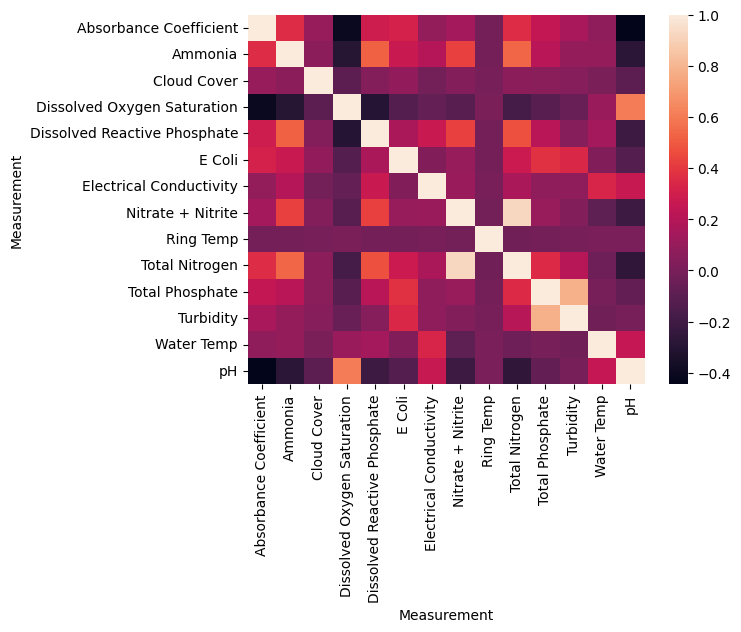

In [109]:
## convert measurements.csv from long to wide
measurements = long_measurements.pivot(index ='checksum', columns='Measurement', values ='Value').reset_index()


measurements.info()
sns.heatmap(measurements.corr());
measurements.dropna( inplace=True)
measurements

#### Describe contents of Measurements Dataframe

For the measurements dataframe, after converting to wide format and dropping the checksum column, there are 14 columns and a total of 29187 rows prior to dropping the NA value; there were also NA values in every single column prior to dropping them. Each column has a datatype as a decimal as they are all measuresments. After dropping the NA values the number of rows increase to 13219.

The correlation heatmap shows some very interesting correlations especially between pH and the Absorbance Coefficient, as well as the Dissolved Oxygen Saturation

#### Variable Removal Justification

For the visits dataframe, I decided to remove the  scientist column as it did not tell us anything useful for modelling purposes as its a non-descriptive non-measurement field and if we are to measure variables by site data, the scientist that took the measure is irrelevant. I also decided to remove days of the week as it is a human construct and a machine would not know the difference between the days of the week so it is useless. Verified by column was removed as it was singular and every single row had the same value meaning the entropy was 0 and it was not useful

In [110]:

visits = visits.drop([ 'Day of Week', 'Verified By', 'Scientist'], axis = 1)
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187 entries, 0 to 29186
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  29187 non-null  object
 1   SiteID     29187 non-null  object
 2   checksum   29187 non-null  object
dtypes: object(3)
memory usage: 684.2+ KB


Timestamp SiteID                          checksum
0      1989-02-01T10:30:00Z    AK1  deda7828c5ca8ae842d1d4c7dbaf8d7c
1      1989-03-15T11:45:00Z    AK1  5c47147d9c97ab9712106a520320c92b
2      1989-04-13T11:10:00Z    AK1  e6b793a64f5092a9ddc3fb850c92b150
3      1989-05-10T11:10:00Z    AK1  efe6310e08bbddf82bf35b713fd7bd94
4      1989-06-08T10:20:00Z    AK1  fc98017089311bfe513985c5e01393e7
...                     ...    ...                               ...
29182  2004-02-11T12:45:00Z    WN4  8fea51e8ae57f65129a00027c42e803d
29183  2004-02-11T14:15:00Z    WN5  c2df132ead5aae6f4e61a052c70fab18
29184  2021-08-17T15:00:00Z    AX3  eeb2bfa3436179b03de1d4e5a0b45f9d
29185  2021-08-17T09:45:00Z    AX4  e9dc7dd246b47be9ae51af4caaab99fd
29186  2021-08-18T08:35:00Z    GY4  7e0b86f360f74867a6094fa9559d1fa8

[29187 rows x 3 columns]

##### Describe contents of Visits Dataframe

The data types for vists data frame are objects represented as strings and include timestamp and site infomration such as the ID of the site, there are no missing values and there is 29187 rows and 3 columns.

#### Variable Removal Justification

For the sites data frame, most of the columns describe site data, I decided to remove catchment area and catchment height as well as altitude as the name of the site and the coordinates made the other values redundant for modelling and descriptive purposes, we just need the basic site data, as specified by the EColi measurements example. SiteID was not removed from this dataframe despite it being included in vists as it was needed to succesfully merge the data together.

In [111]:

sites = sites.drop(['Altitude', 'Catchment area', 'Catchment height'], axis = 1)
            
sites.info()
sites

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SiteID     77 non-null     object 
 1   Region     77 non-null     object 
 2   Name       77 non-null     object 
 3   Longitude  77 non-null     float64
 4   Latitude   77 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.1+ KB


SiteID      Region                     Name   Longitude   Latitude
0     AK1    Auckland           Hoteo at Gubbs  174.516776 -36.387085
1     AK2    Auckland   Rangitopuni at Walkers  174.617716 -36.746082
2     AX1   Alexandra    Clutha at Luggate Br.  169.279966 -44.730920
3     AX2   Alexandra      Kawarau at Chard Rd  168.868674 -45.007995
4     AX3   Alexandra  Shotover at Bowens Peak  168.714900 -44.991606
..    ...         ...                      ...         ...        ...
72    WN1  Wellington         Hutt at Boulcott  174.921966 -41.199706
73    WN2  Wellington          Hutt at Kaitoke  175.191361 -41.052600
74    WN3  Wellington   Ruamahanga at Waihenga  175.439426 -41.197160
75    WN4  Wellington   Ruamahanga at Wardells  175.671349 -41.004683
76    WN5  Wellington        Ruamahanga at SH2  175.604835 -40.763879

[77 rows x 5 columns]

There are 5 columns in the quality dataframe,  with a mixture of decimals and strings as object types. Out of 77 entries none of them are null.

#### Combine Dataframes into one

After merging, I removed the "checksum" column as it was only neccesary for merging, and does not provide any insights or data when it comes to modelling specifically.

In [114]:
cdf = sites.merge(visits)


cdf= cdf.merge(measurements, how='inner')
cdf = cdf.drop('checksum', axis = 1)
cdf

SiteID      Region               Name   Longitude   Latitude  \
0        AK1    Auckland     Hoteo at Gubbs  174.516776 -36.387085   
1        AK1    Auckland     Hoteo at Gubbs  174.516776 -36.387085   
2        AK1    Auckland     Hoteo at Gubbs  174.516776 -36.387085   
3        AK1    Auckland     Hoteo at Gubbs  174.516776 -36.387085   
4        AK1    Auckland     Hoteo at Gubbs  174.516776 -36.387085   
...      ...         ...                ...         ...        ...   
13214    WN5  Wellington  Ruamahanga at SH2  175.604835 -40.763879   
13215    WN5  Wellington  Ruamahanga at SH2  175.604835 -40.763879   
13216    WN5  Wellington  Ruamahanga at SH2  175.604835 -40.763879   
13217    WN5  Wellington  Ruamahanga at SH2  175.604835 -40.763879   
13218    WN5  Wellington  Ruamahanga at SH2  175.604835 -40.763879   

                  Timestamp  Absorbance Coefficient  Ammonia  Cloud Cover  \
0      2005-02-17T10:15:00Z                   18.51      8.0          3.0   
1      2005-03-16T09:40:00Z                   15.91      6.0          2.0   
2      2005-04-28T10:20:00Z                   14.50      1.0          7.0   
3      2005-05-25T10:00:00Z                   26.63     28.0          5.0   
4      2005-06-15T10:00:00Z                   16.35     26.0          0.0   
...                     ...                     ...      ...          ...   
13214  2020-08-19T13:10:00Z                    1.40      4.0          8.0   
13215  2020-09-15T13:05:00Z                    6.90      1.0          3.0   
13216  2020-10-28T12:25:00Z                    7.20      4.0          8.0   
13217  2020-11-18T12:15:00Z                    8.70      4.0          8.0   
13218  2020-12-16T12:50:00Z                    2.20      2.0          0.0   

       Dissolved Oxygen Saturation  Dissolved Reactive Phosphate   E Coli  \
0                             88.9                          21.4   120.00   
1                             90.7                          14.1    41.00   
2                             89.6                          17.7    86.00   
3                             82.1                          27.8   203.00   
4                             88.5                          28.0  1046.24   
...                            ...                           ...      ...   
13214                        102.4                           0.7     7.40   
13215                        101.2                           2.0     4.10   
13216                         99.9                           2.2     7.40   
13217                        101.0                           2.0   131.30   
13218                        102.1                           2.6     4.10   

       Electrical Conductivity  Nitrate + Nitrite  Ring Temp  Total Nitrogen  \
0                        190.0              155.0  15.070833           489.0   
1                        204.0                4.0  15.370426           261.0   
2                        227.0                6.0 -15.637455           283.0   
3                        207.0              694.0 -15.699682          1269.0   
4                        198.0              637.0  14.813845          1108.0   
...                        ...                ...        ...             ...   
13214                     64.5               34.0 -12.864292            65.0   
13215                     32.6               24.0 -14.150972            92.0   
13216                     39.4               20.0  14.291256            95.0   
13217                     38.0               17.0  15.429841           123.0   
13218                     54.8               32.0  15.699682            80.0   

       Total Phosphate  Turbidity  Water Temp    pH  
0                 65.0       8.20        20.1  7.43  
1                 51.0       6.00        18.9  7.62  
2                 48.0       4.90        14.3  7.66  
3                 77.0       9.50        15.6  7.22  
4                 74.0      12.00        10.5  7.37  
...                ...        

#### Visualisations

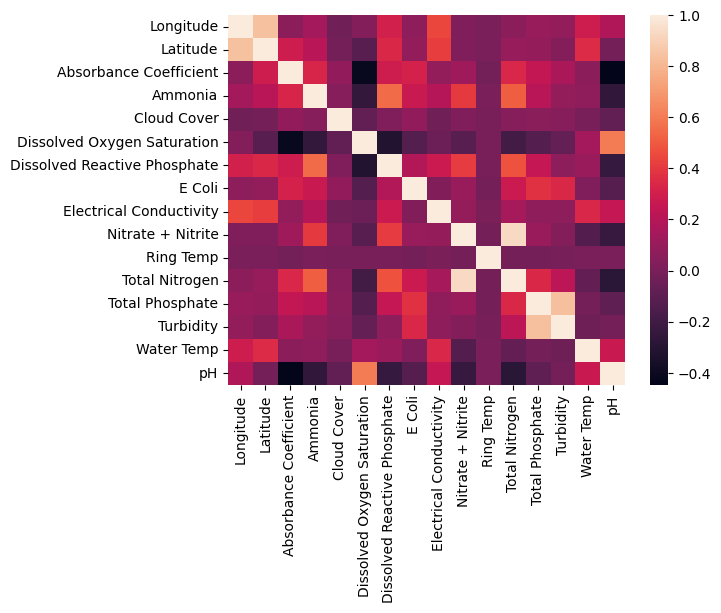

In [115]:
sns.heatmap(cdf.corr());

#### Extract E-Coli Information